In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [5]:
train.shape

(595212, 59)

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

In [7]:
test.shape

(892816, 58)

In [8]:
# Metadata
data = []
for f in train.columns:
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        f == 'input'

    if 'bin' in f or f =='target':
        level = 'binary'
    elif 'cat' in f or f =='id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
        
    keep = True
    if f == 'id':
        keep = False
        
    dtype = train[f].dtype
    
    f_dict ={
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,target,ordinal,True,int64
ps_ind_02_cat,target,nominal,True,int64
ps_ind_03,target,ordinal,True,int64
ps_ind_04_cat,target,nominal,True,int64
ps_ind_05_cat,target,nominal,True,int64
ps_ind_06_bin,target,binary,True,int64
ps_ind_07_bin,target,binary,True,int64


In [9]:
v = meta[(meta.level == 'interval') & meta.keep].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [11]:
v = meta[(meta.level == 'ordinal') & meta.keep].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [12]:
v = meta[(meta.level == 'binary') & meta.keep].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
desired_apriori = 0.1

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1-desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)

undersampled_idx = shuffle(idx_0, random_state=0, n_samples=undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop=True)

In [14]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings / train.shape[0]
        
        print(f'변수 {f} 는 {missings} 개의 결측값을 가지고 있으며, 퍼센트는 {missings_perc:.2%} 이다.')

print(f'전체 결측값 칼럼 갯수: {len(vars_with_missing)}')

변수 ps_ind_02_cat 는 94 개의 결측값을 가지고 있으며, 퍼센트는 0.04% 이다.
변수 ps_ind_04_cat 는 50 개의 결측값을 가지고 있으며, 퍼센트는 0.02% 이다.
변수 ps_ind_05_cat 는 2275 개의 결측값을 가지고 있으며, 퍼센트는 1.05% 이다.
변수 ps_reg_03 는 38827 개의 결측값을 가지고 있으며, 퍼센트는 17.90% 이다.
변수 ps_car_01_cat 는 55 개의 결측값을 가지고 있으며, 퍼센트는 0.03% 이다.
변수 ps_car_02_cat 는 2 개의 결측값을 가지고 있으며, 퍼센트는 0.00% 이다.
변수 ps_car_03_cat 는 148792 개의 결측값을 가지고 있으며, 퍼센트는 68.59% 이다.
변수 ps_car_05_cat 는 96165 개의 결측값을 가지고 있으며, 퍼센트는 44.33% 이다.
변수 ps_car_07_cat 는 4488 개의 결측값을 가지고 있으며, 퍼센트는 2.07% 이다.
변수 ps_car_09_cat 는 215 개의 결측값을 가지고 있으며, 퍼센트는 0.10% 이다.
변수 ps_car_11 는 2 개의 결측값을 가지고 있으며, 퍼센트는 0.00% 이다.
변수 ps_car_14 는 15649 개의 결측값을 가지고 있으며, 퍼센트는 7.21% 이다.
전체 결측값 칼럼 갯수: 12


In [17]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)

meta.loc[(vars_to_drop), 'keep'] = False

mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

In [19]:
v = meta[(meta.level == 'nominal') & meta.keep].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print(f'변수 {f} 는 {dist_values} 개의 값을 가지고 있다.')

변수 ps_ind_02_cat 는 5 개의 값을 가지고 있다.
변수 ps_ind_04_cat 는 3 개의 값을 가지고 있다.
변수 ps_ind_05_cat 는 8 개의 값을 가지고 있다.
변수 ps_car_01_cat 는 13 개의 값을 가지고 있다.
변수 ps_car_02_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_04_cat 는 10 개의 값을 가지고 있다.
변수 ps_car_06_cat 는 18 개의 값을 가지고 있다.
변수 ps_car_07_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_08_cat 는 2 개의 값을 가지고 있다.
변수 ps_car_09_cat 는 6 개의 값을 가지고 있다.
변수 ps_car_10_cat 는 3 개의 값을 가지고 있다.
변수 ps_car_11_cat 는 104 개의 값을 가지고 있다.


In [20]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, tst_series=None, target=None, min_samples_leaf=1, smoothing=1, noise_level=0):
    '''
    trn_series: train의 카테고리 피쳐(pd.Series)
    tst_series: test의 카테고리 피쳐(pd.Series)
    target: target 데이터(pd.Series)
    min_samples_leaf(int): 카테고리 평균을 고려할 최소 샘플 수
    smoothing(int): 범주형 평균과 이전의 평균의 균형을 유지하는 평활 효과
    '''
    # assert: 가정설정문, 어떤 조건을 테스트하는 디버깅 보조 도구
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean', 'count'])
    # smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    # 모든 target에 평균 적용
    prior = target.mean()
    # count가 클수록 full_avg가 적게 고려된다.
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis=1, inplace=True)
    # trn에 평균 적용 및 인덱스 복구
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                            on=trn_series.name,
                            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_trn_series.index = trn_series.index
    # tst에 평균 적용 및 인덱스 복구
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
                            on=tst_series.name,
                            how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], 
                                            test['ps_car_11_cat'],
                                            target=train.target, 
                                            min_samples_leaf=100,
                                            smoothing=10,
                                            noise_level=0.01)
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

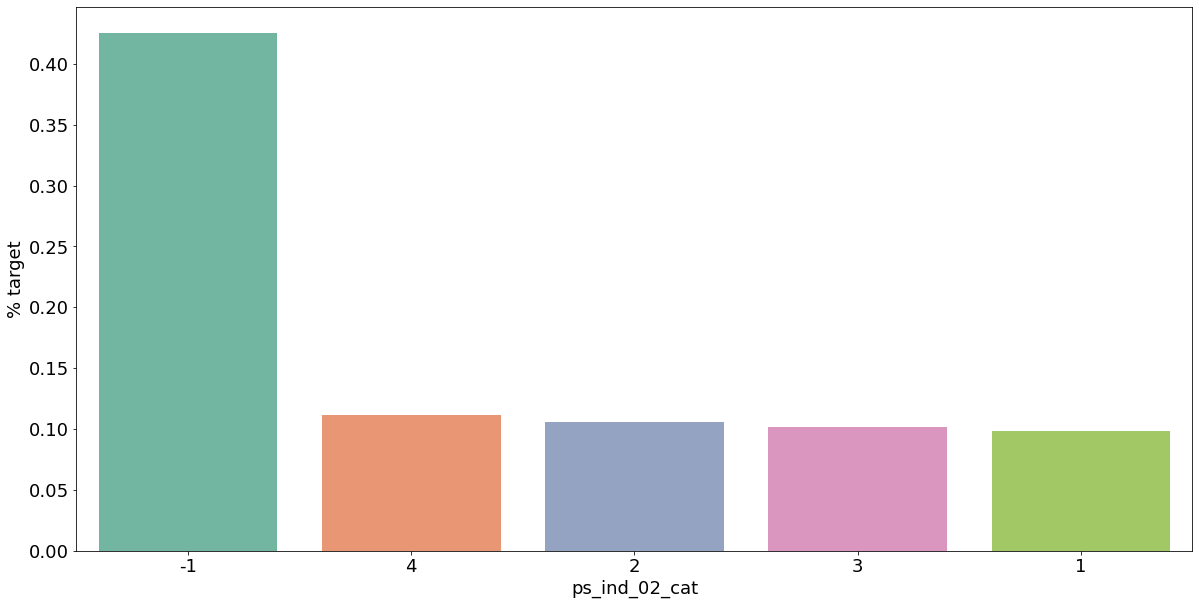

<Figure size 432x288 with 0 Axes>

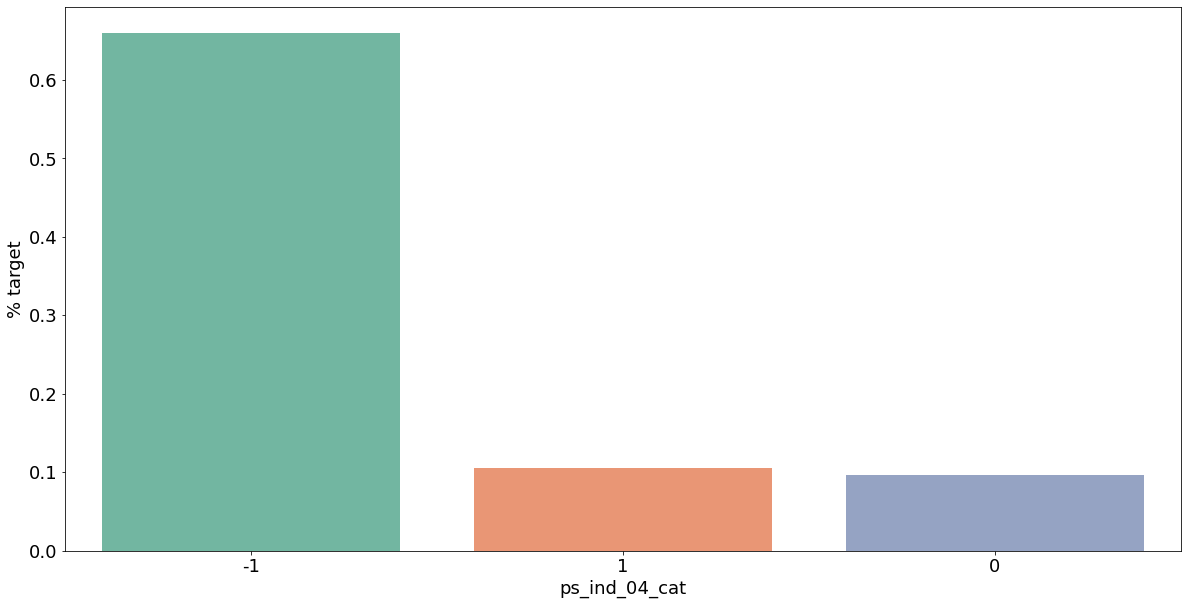

<Figure size 432x288 with 0 Axes>

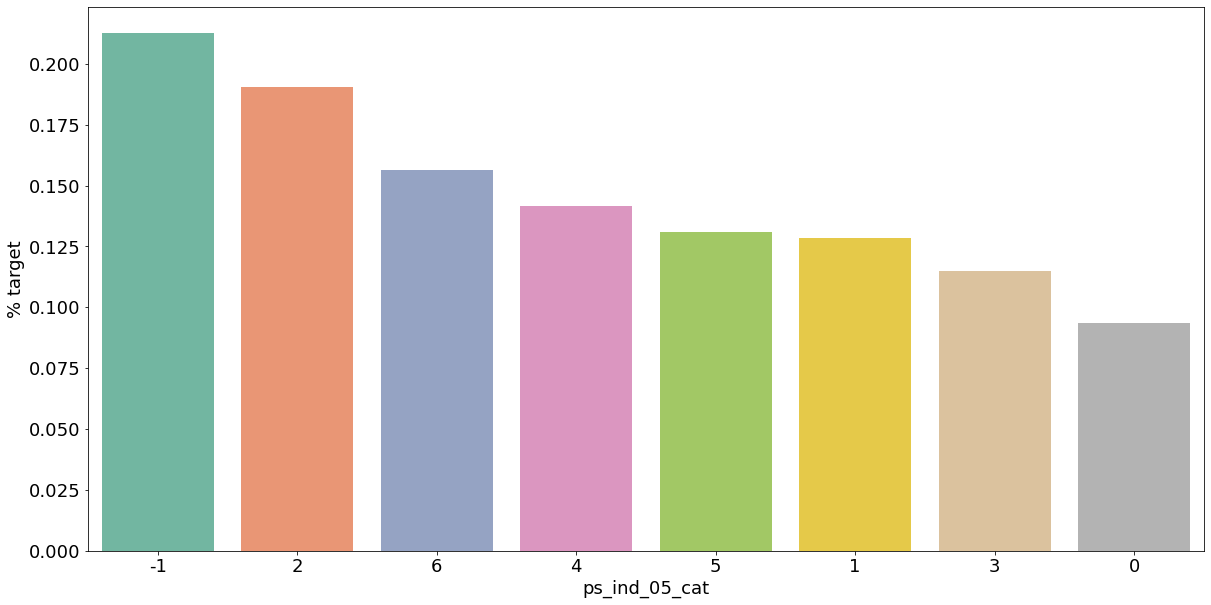

<Figure size 432x288 with 0 Axes>

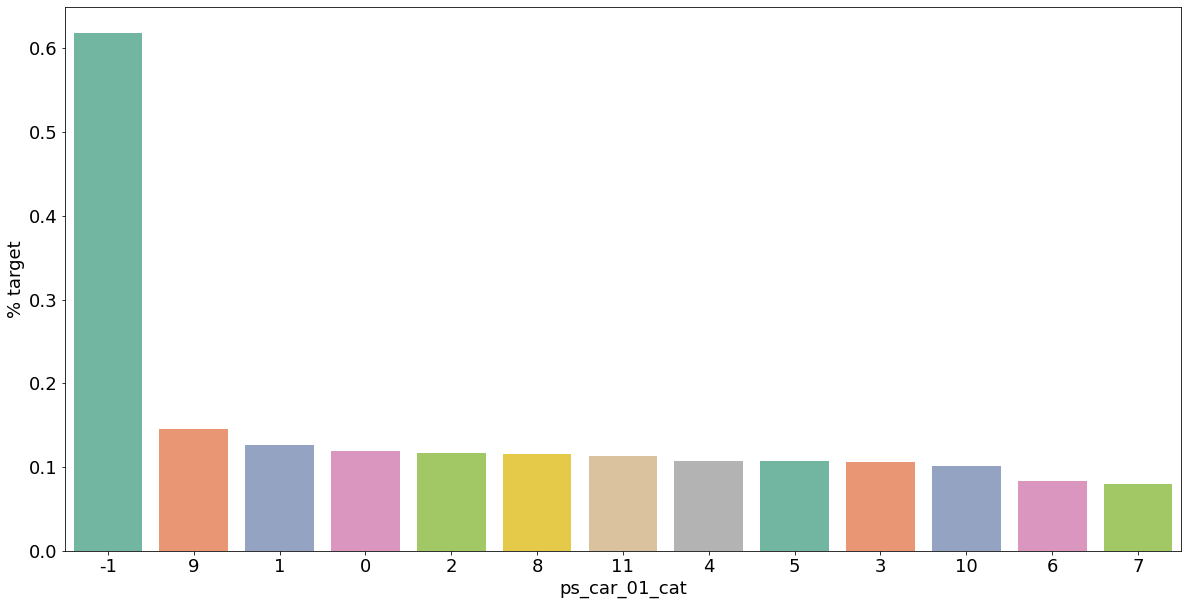

<Figure size 432x288 with 0 Axes>

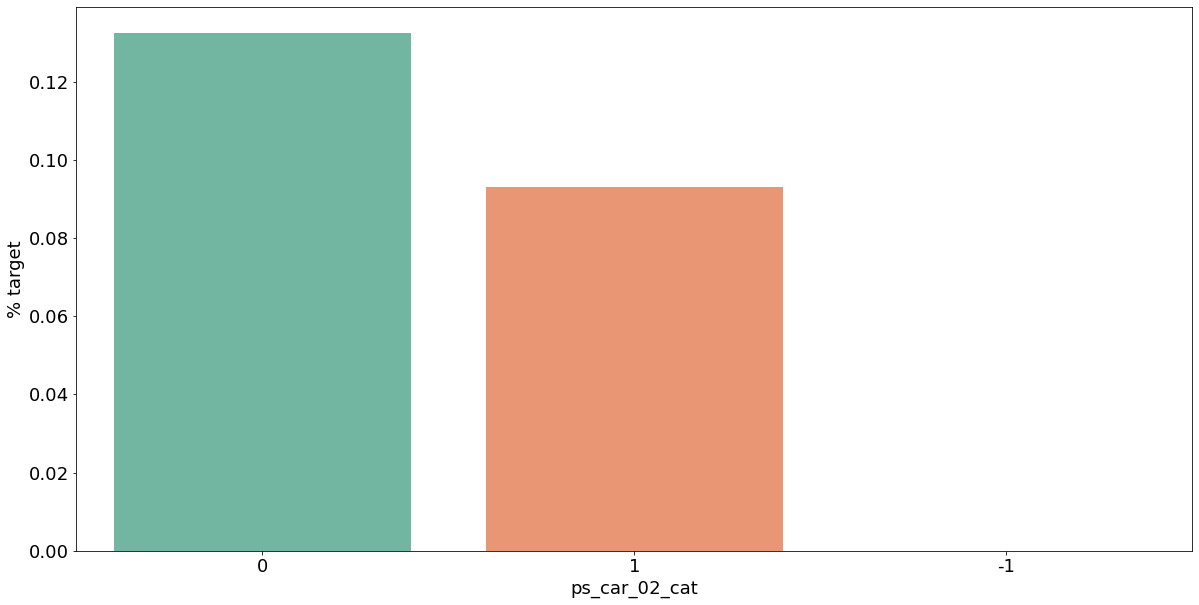

<Figure size 432x288 with 0 Axes>

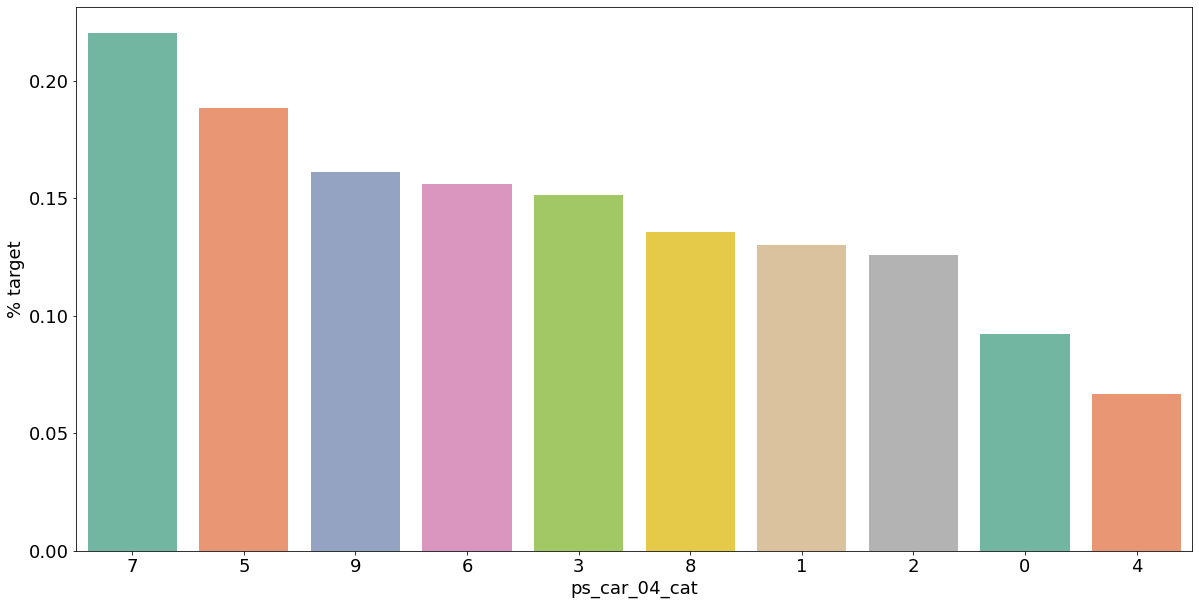

<Figure size 432x288 with 0 Axes>

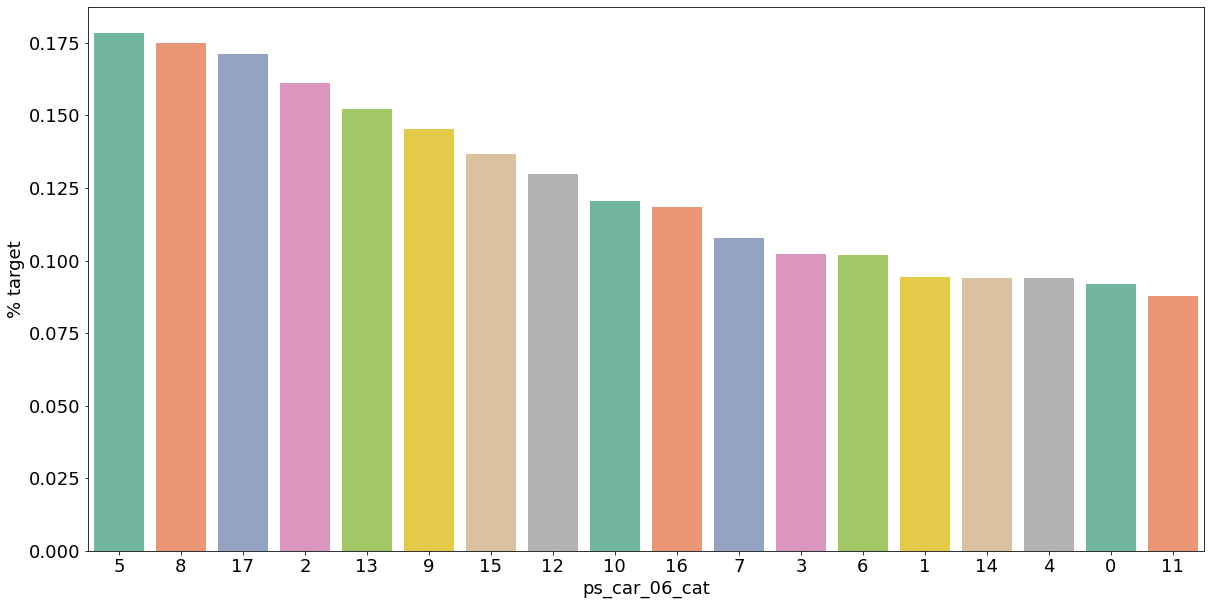

<Figure size 432x288 with 0 Axes>

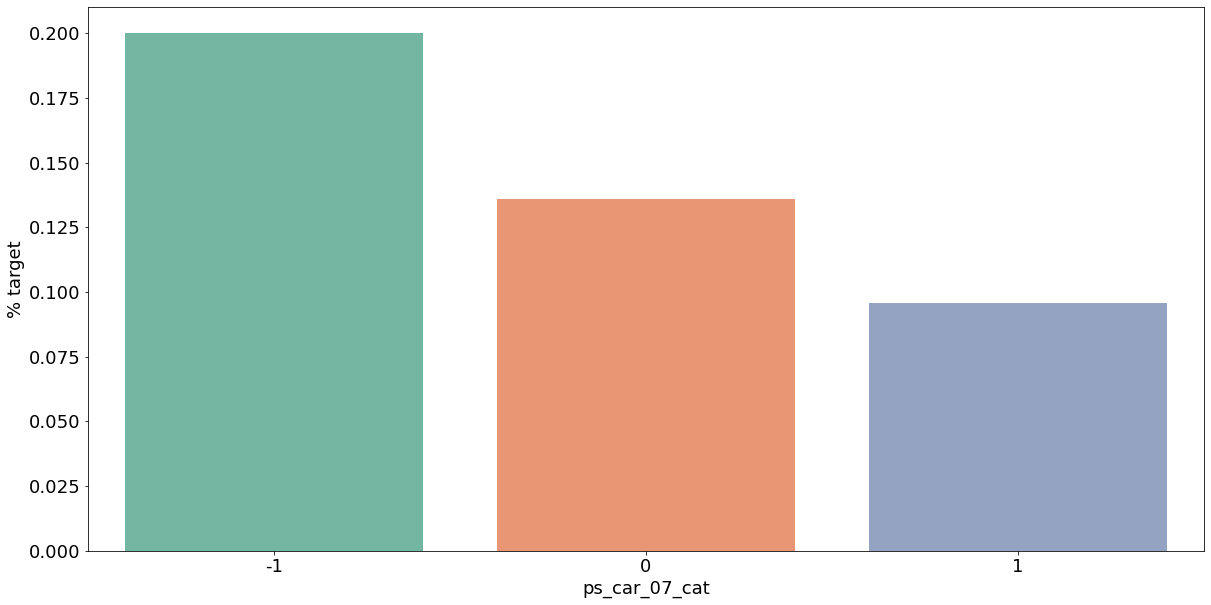

<Figure size 432x288 with 0 Axes>

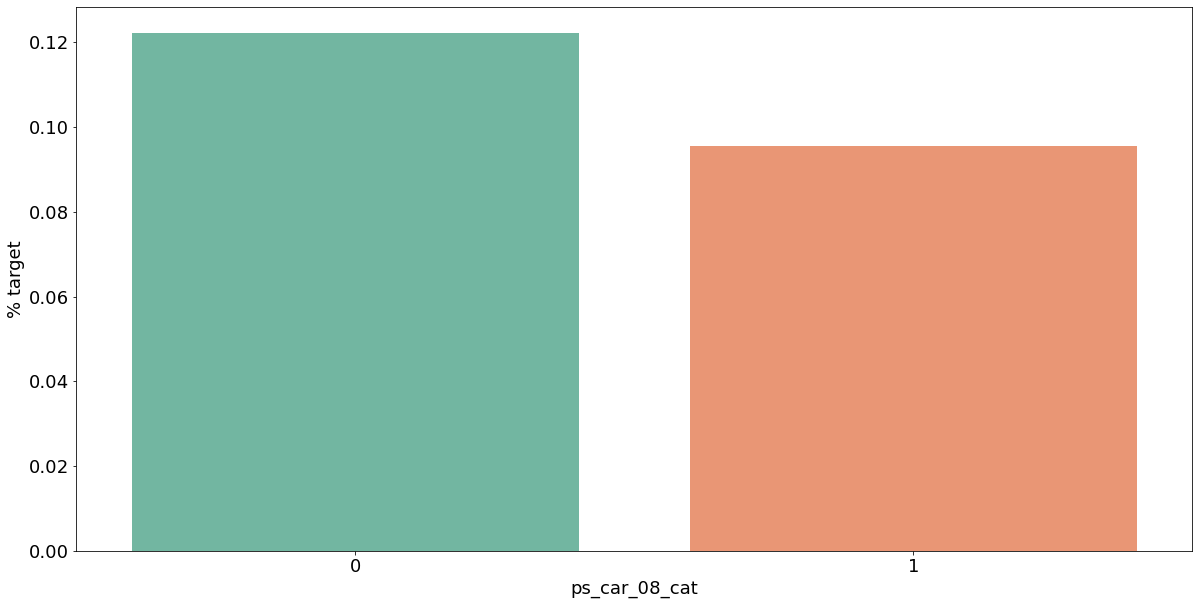

<Figure size 432x288 with 0 Axes>

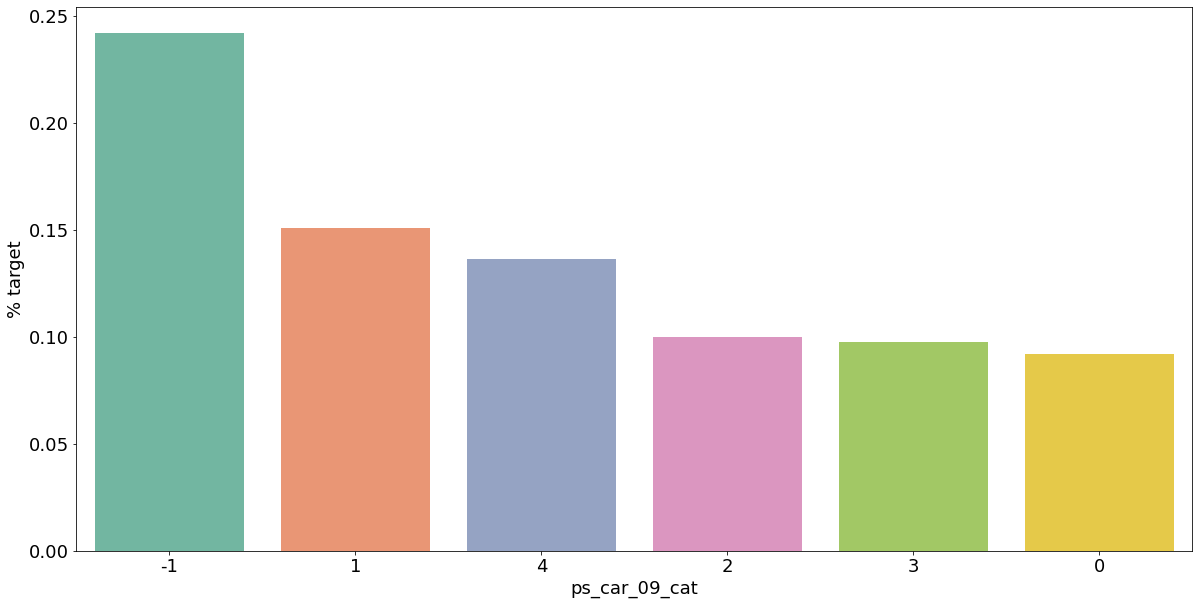

<Figure size 432x288 with 0 Axes>

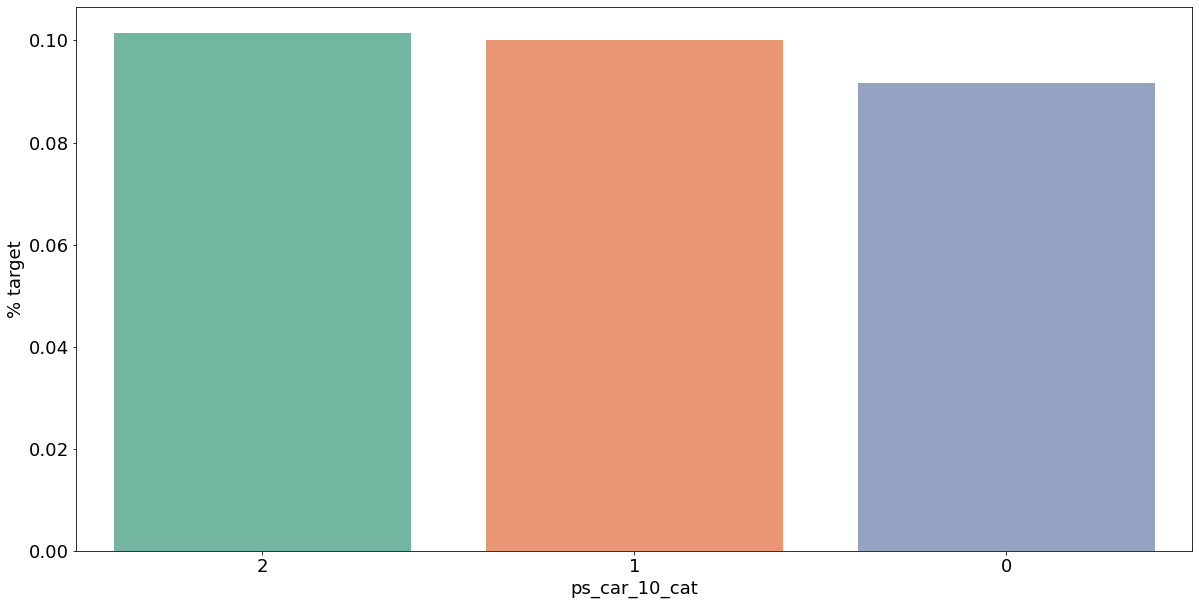

In [22]:
v = meta[(meta.level == 'nominal') & meta.keep].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20, 10))
    cat_perc = train[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f], palette='Set2')
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

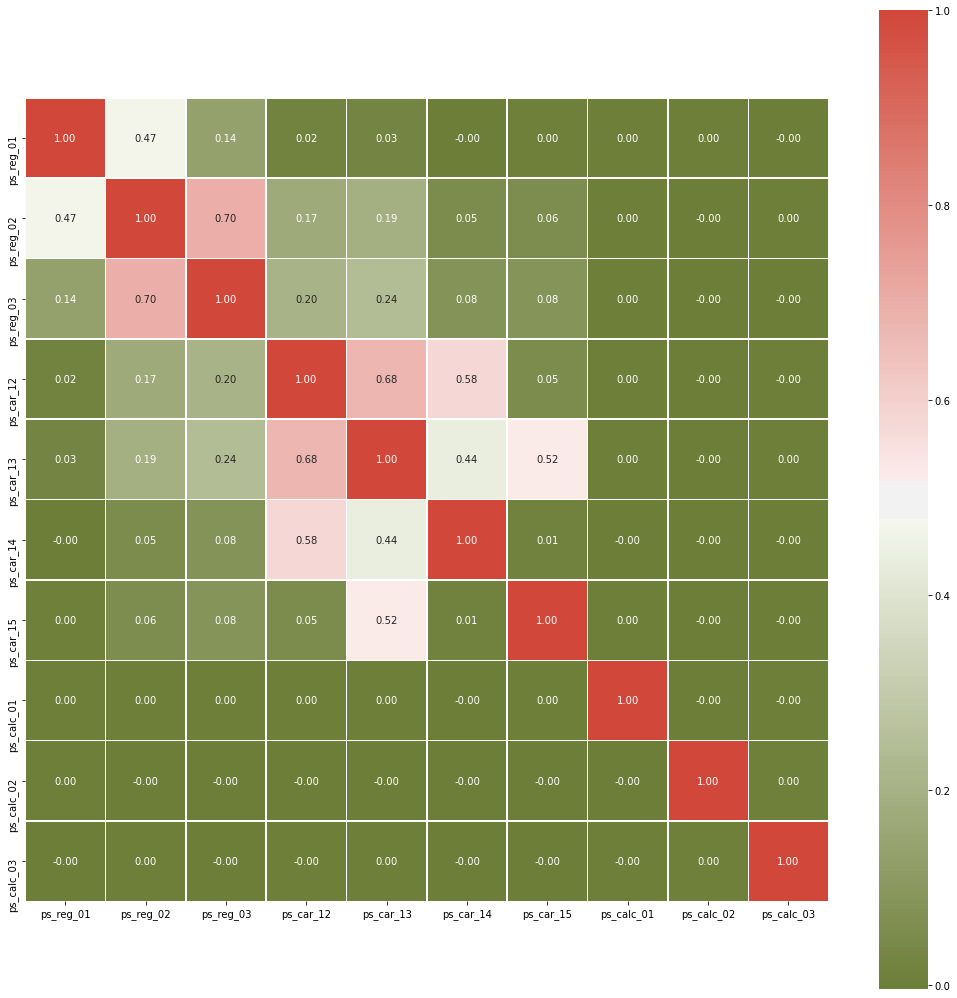

In [23]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(100, 15, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(18, 18))
    sns.heatmap(correlations, cmap=cmap, fmt='.2f', square=True, linewidths=.5, annot=True)
    
v = meta[(meta.level == 'interval') & meta.keep].index
corr_heatmap(v)

In [24]:
s = train.sample(frac=0.1)

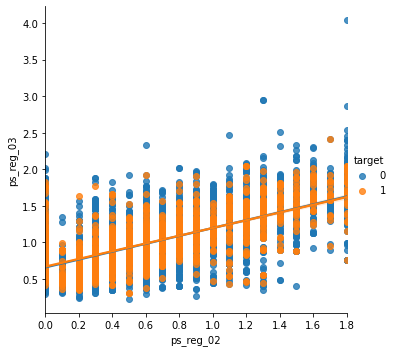

In [25]:
sns.lmplot('ps_reg_02', 'ps_reg_03', data=s, hue='target', palette='tab10')

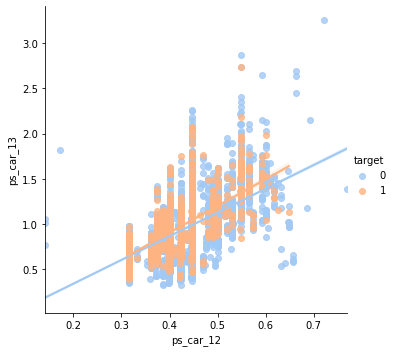

In [26]:
sns.lmplot('ps_car_12', 'ps_car_13', data=s, hue='target', palette='pastel')

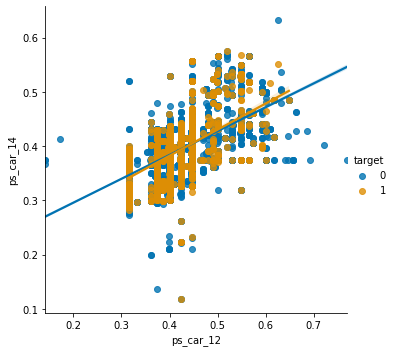

In [27]:
sns.lmplot('ps_car_12', 'ps_car_14', data=s, hue='target', palette='colorblind')

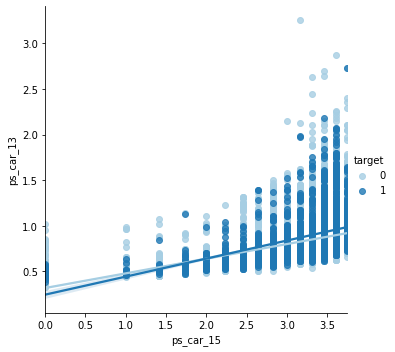

In [29]:
sns.lmplot('ps_car_15', 'ps_car_13', hue='target', data=s, palette='Paired')

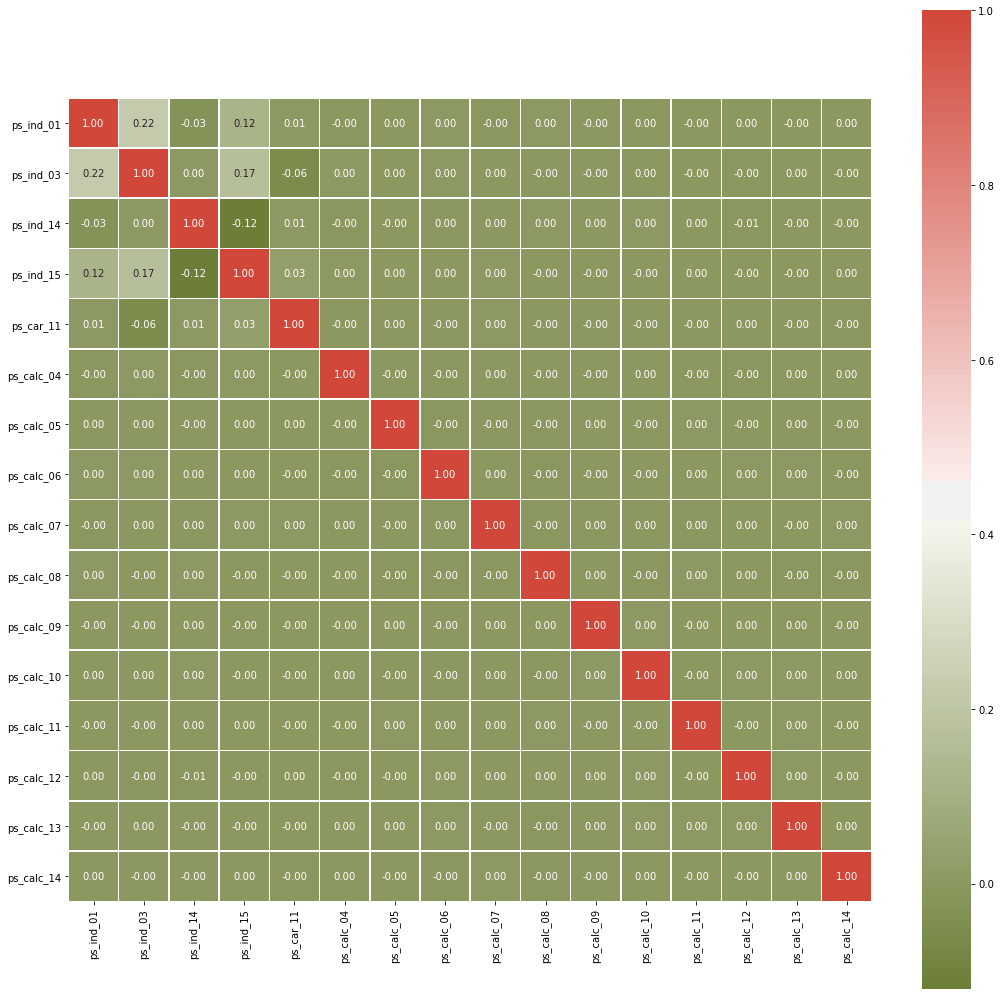

In [30]:
v = meta[(meta.level == 'ordinal') & meta.keep].index
corr_heatmap(v)

In [31]:
v = meta[(meta.level == 'nominal') & meta.keep].index
train = pd.get_dummies(train, columns=v, drop_first=True)

In [33]:
v = meta[(meta.level == 'interval') & meta.keep].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)
train = pd.concat([train, interactions], axis=1)

In [34]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1))
f = np.vectorize(lambda x: not x)
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print(f'{len(v)} 개의 변수가 너무 낮은 분산을 가지고 있다.')
print(f'분산이 많은 변수 리스트:\n{list(v)}')

29 개의 변수가 너무 낮은 분산을 가지고 있다.
분산이 많은 변수 리스트:
['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [35]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_04_cat_4                0.000040
 2) ps_car_10_cat_2                0.000066
 3) ps_ind_10_bin                  0.000077
 4) ps_car_04_cat_7                0.000082
 5) ps_car_04_cat_5                0.000096
 6) ps_car_06_cat_8                0.000105
 7) ps_car_06_cat_2                0.000127
 8) ps_ind_13_bin                  0.000145
 9) ps_car_04_cat_3                0.000151
10) ps_car_04_cat_6                0.000214
11) ps_ind_11_bin                  0.000220
12) ps_car_06_cat_5                0.000272
13) ps_ind_05_cat_5                0.000318
14) ps_car_01_cat_1                0.000368
15) ps_car_06_cat_13               0.000391
16) ps_car_06_cat_12               0.000419
17) ps_car_04_cat_9                0.000427
18) ps_car_06_cat_16               0.000493
19) ps_car_06_cat_17               0.000542
20) ps_car_04_cat_8                0.000550
21) ps_car_01_cat_2                0.000564
22) ps_car_09_cat_4                0.000633
23) ps_ind_05_cat_3             

In [36]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
n_features = sfm.transform(X_train).shape[1]
selected_vars = list(feat_labels[sfm.get_support()])

In [37]:
train = train[selected_vars + ['target']] 

In [38]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.96419605, -0.90189851,  0.76771678, ..., -1.02369121,
        -1.00941416, -1.06045104],
       [-0.96419605, -1.27199931,  0.48564541, ..., -1.02369121,
        -0.61089243,  1.32374468],
       [ 1.54974168, -0.90189851, -0.36056871, ..., -0.91190646,
        -0.8101533 , -0.91143881],
       ...,
       [-0.96419605,  0.57850472,  0.48564541, ..., -0.46476743,
         0.18615102,  0.28065905],
       [-0.96419605, -0.90189851, -1.4888542 , ..., -0.91190646,
        -0.41163157,  0.28065905],
       [-0.46140851, -1.27199931,  1.6139309 , ...,  0.28046428,
        -0.11274028, -0.72517352]])